# Random Forest Project

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [3]:
df = pd.read_csv('heart_prediction.csv')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [8]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf=RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [14]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='auto',
                        random_state=1914837113)]

In [15]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [16]:
sample_tree = rf.estimators_[4]

In [17]:
sample_tree

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378)

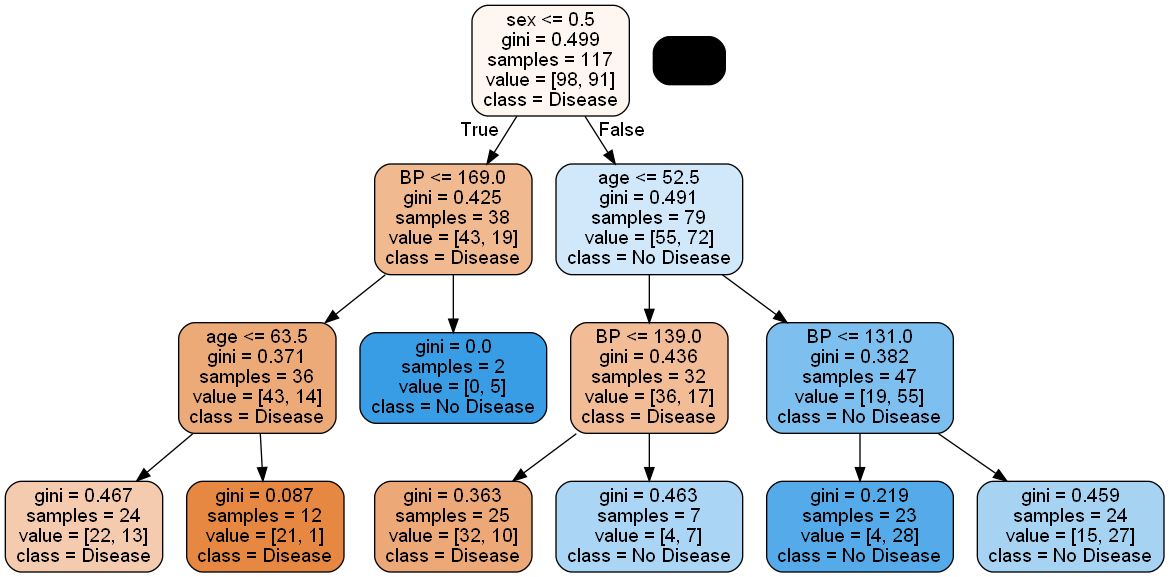

In [18]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png(), width=700, height=700)

In [19]:
sample_tree_1 = rf.estimators_[0]

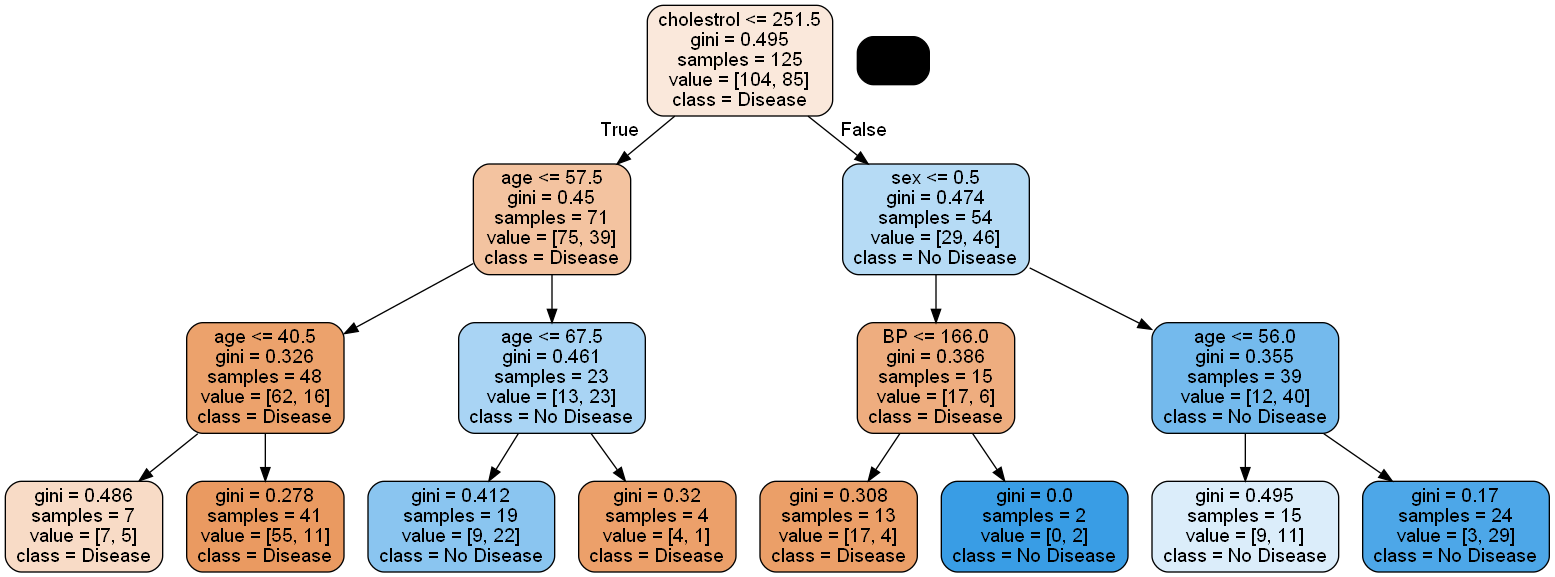

In [20]:
gph = get_dt_graph(sample_tree_1)
Image(gph.create_png(), width=700, height=700)

# OOB SCORE

In [21]:
rf=RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3,oob_score=True)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [23]:
rf.oob_score_

0.6349206349206349

## Grid search for hyper-parameter tuning

In [24]:
rf=RandomForestClassifier(random_state=42, n_jobs=-1)

In [25]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [28]:
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 30}

In [30]:
rf_best = grid_search.best_estimator_

In [31]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [35]:
evaluate_model(rf_best)

Train Accuracy : 0.8042328042328042
Train Confusion Matrix:
[[87 14]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.8024691358024691
Test Confusion Matrix:
[[42  7]
 [ 9 23]]


### Variable importance in RandomForest and Decision trees

In [36]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [37]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [38]:
classifier_rf.feature_importances_

array([0.37539743, 0.13780788, 0.20834585, 0.27844883])

In [39]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [40]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808


In [41]:
rf_best.feature_importances_

array([0.33065969, 0.19421214, 0.16377868, 0.31134948])

In [42]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [43]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.330660
3,cholestrol,0.311349
1,sex,0.194212
2,BP,0.163779


### so most important variable in features is age for clasification in this data